## Final Project Submission

Please fill out:
* Student name: Antony Kimanthi Mbindyo
* Student pace: full time
* Scheduled project review date/time: 21-11-22 / 0000hrs
* Instructor name: Mark Tiba



## Business Understanding 

Microsoft wants  to venture into the Movie Industry Business which has been here for a quite significant time. They have decided to create a movie studio and want to get insights of which kind of films they will present to the world.



## Data Understanding

This findings and conclusions of this research will be collected from Datasets of different websites i.e Box Office Mojo,
IMDB, TheMovieDB and The Numbers. This data will give an overview to the stakeholders to help them in their decision making.

In [2]:


#Install Libraries 
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import gzip
import sqlite3

%matplotlib inline

## Data Extracting & Preparation 

#### CSV Extracting

In [3]:
#Extracting Data
# Dataset 1

gross = pd.read_csv('bom.movie_gross.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
# Checking null values & Dups
gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [5]:
gross.duplicated().value_counts()

False    3387
dtype: int64

In [6]:
gross.drop(['foreign_gross' ], axis =1, inplace=True)

In [7]:
gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [8]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 106.0+ KB


In [9]:
gross.groupby('studio')['domestic_gross'].mean().head(10)

studio
3D     6.100000e+06
A23    8.210000e+04
A24    6.616208e+06
ADC    1.241000e+05
AF     3.571500e+05
AGF    1.580000e+04
ALP    2.800000e+03
AM     2.370000e+05
AR     3.500000e+05
ATO    3.733750e+05
Name: domestic_gross, dtype: float64

In [10]:
gross.sort_values('domestic_gross')

,title,studio,domestic_gross,year
1476,Storage 24,Magn.,100.0,2013
2321,The Chambermaid,FM,300.0,2015
2756,News From Planet Mars,KL,300.0,2016
2757,Satanic,Magn.,300.0,2016
1018,Apartment 143,Magn.,400.0,2012
...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,2015
2392,Finding Mr. Right 2,CL,NaN,2016
2468,Solace,LGP,NaN,2016
2595,Viral,W/Dim.,NaN,2016


In [11]:
dp = gross[(gross['domestic_gross'] == 0)]

In [12]:
gross.drop(dp.index, axis=0, inplace=True)
gross.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [13]:
gross.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [14]:
gross.dropna(axis=0, subset = ['domestic_gross'], inplace=True)

In [15]:

gross.isna().sum()

title             0
studio            3
domestic_gross    0
year              0
dtype: int64

In [16]:
gross.duplicated(subset= ['title', 'domestic_gross']).sum()

0

In [17]:
#Dataset 2

vote = pd.read_csv('tmdb.movies.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 
vote

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [18]:
#Checking Null & Dups

vote.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [19]:
vote.duplicated().value_counts()

False    26517
dtype: int64

In [20]:
vote = vote.drop_duplicates()

In [21]:
vote.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [22]:
vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.2+ MB


In [23]:
vote

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [24]:
vote.duplicated(subset=['original_title', 'release_date']).sum()

1026

In [25]:
vote.shape

(26517, 10)

In [26]:
vote.drop_duplicates(subset = ['original_title', 'release_date'], inplace=True)
vote.shape

(25491, 10)

In [27]:
#vote.groupby('vote_average')['popularity'].mean().head(10)

In [28]:
# Dataset3

In [29]:
budget = pd.read_csv('tn.movie_budgets.csv.gz', compression='gzip', header=0, sep=',', quotechar='"') 
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [30]:
#Checking Null & Dups

budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [31]:
budget.duplicated().value_counts()

False    5782
dtype: int64

In [32]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
budget.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [34]:
budget.duplicated(subset=['production_budget', 'release_date','domestic_gross','movie']).sum()

0

### TSV Extracting

In [35]:
info = pd.read_table('rt.movie_info.tsv.gz') 
info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [36]:
#Checking Null 

info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [37]:
info.drop(columns=['currency', 'box_office', 'studio'], inplace=True)

In [38]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   runtime       1530 non-null   object
dtypes: int64(1), object(8)
memory usage: 109.8+ KB


In [39]:
info.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [40]:
info.duplicated().value_counts()


False    1560
dtype: int64

In [41]:
reviews = pd.read_table('rt.reviews.tsv.gz', encoding = 'unicode_escape')
reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [42]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [43]:
reviews.duplicated().value_counts()

False    54423
True         9
dtype: int64

In [44]:
reviews.isna().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [45]:
reviews = reviews.drop_duplicates()

### SQL Extracting


In [46]:
conn = sqlite3.Connection("im.db")

m_basics = """
SELECT *
FROM movie_basics
LIMIT 10
;
"""
basics =pd.read_sql(m_basics, conn)
basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography


In [47]:
# Checking null values & Dups
basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    3
genres             0
dtype: int64

In [48]:
basics.duplicated().sum()

0

In [49]:
basics.describe()

,start_year,runtime_minutes
count,10.000000,7.000000
mean,2016.100000,104.428571
std,2.685351,36.068717
min,2012.000000,75.000000
25%,2014.000000,81.000000
50%,2017.000000,83.000000
75%,2018.000000,118.000000
max,2019.000000,175.000000


In [50]:
basics.duplicated(subset=['genres', 'runtime_minutes','original_title']).sum()

0

In [51]:
m_ratings = """
SELECT *
FROM movie_ratings
LIMIT 10
;
"""
ratings = pd.read_sql(m_ratings, conn)
ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [52]:
ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [53]:
ratings.duplicated().sum()

0

In [54]:
conn.close()

## Merging Datasets

In [55]:
#Renaming Columns from the 2 Datasets to have a unique column in each : (gross, vote)

gross.rename(columns={'title':'movie'}, inplace=True)

In [56]:
vote.rename(columns={'original_title':'movie'}, inplace=True)

In [57]:
#Fulldataset i.e joined = fd

fd = budget.merge( gross,how = 'inner', on ='movie').merge(vote, how = 'inner', on ='movie')

In [58]:
fd.shape

(1242, 18)

In [59]:
fd.head()

,id_x,release_date_x,movie,production_budget,domestic_gross_x,worldwide_gross,studio,domestic_gross_y,year,Unnamed: 0,genre_ids,id_y,original_language,popularity,release_date_y,title,vote_average,vote_count
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",BV,241100000.0,2011,2470,"[12, 28, 14]",1865,en,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",BV,459000000.0,2015,14169,"[28, 12, 878]",99861,en,44.383,2015-05-01,Avengers: Age of Ultron,7.3,13457
2,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",BV,678800000.0,2018,23811,"[12, 28, 14]",299536,en,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
3,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209",WB,229000000.0,2017,20623,"[28, 12, 14, 878]",141052,en,34.953,2017-11-17,Justice League,6.2,7510
4,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923",Sony,200100000.0,2015,14175,"[28, 12, 80]",206647,en,30.318,2015-11-06,Spectre,6.4,6719


In [60]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 1241
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_x               1242 non-null   int64  
 1   release_date_x     1242 non-null   object 
 2   movie              1242 non-null   object 
 3   production_budget  1242 non-null   object 
 4   domestic_gross_x   1242 non-null   object 
 5   worldwide_gross    1242 non-null   object 
 6   studio             1241 non-null   object 
 7   domestic_gross_y   1242 non-null   float64
 8   year               1242 non-null   int64  
 9   Unnamed: 0         1242 non-null   int64  
 10  genre_ids          1242 non-null   object 
 11  id_y               1242 non-null   int64  
 12  original_language  1242 non-null   object 
 13  popularity         1242 non-null   float64
 14  release_date_y     1242 non-null   object 
 15  title              1242 non-null   object 
 16  vote_average       1242 

In [61]:
fd.drop(columns= ['year', 'id_x', 'release_date_x', 'id_y','title', 'genre_ids','Unnamed: 0', 'domestic_gross_y'], inplace =True)

In [62]:
fd['production_budget'] = fd['production_budget'].str.replace('$','')
fd['production_budget'] = fd['production_budget'].str.replace(',','')
fd['domestic_gross_x'] = fd['domestic_gross_x'].str.replace('$','')
fd['domestic_gross_x'] = fd['domestic_gross_x'].str.replace(',','')
fd['worldwide_gross'] = fd['worldwide_gross'].str.replace('$','')
fd['worldwide_gross'] = fd['worldwide_gross'].str.replace(',','')


In [63]:
fd['production_budget'] = fd['production_budget'].astype('int64')
fd['domestic_gross_x'] = fd['domestic_gross_x'].astype('int64')
fd['worldwide_gross'] = fd['worldwide_gross'].astype('int64')

In [64]:
fd.rename(columns={'domestic_gross_x':'domestic_gross','release_date_y':'release_date'}, inplace=True)

In [65]:
fd.shape

(1242, 10)

In [66]:
fd.isna().sum()

movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
studio               1
original_language    0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64

In [67]:
fd.dropna(axis=0, subset = ['studio'], inplace=True)

In [68]:
fd.duplicated(['movie','release_date','vote_count']).sum()

13

In [69]:
fd.drop_duplicates(subset= ['movie','release_date','vote_count'] ,inplace=True)

In [70]:
#Restructuring the Columns

column_names ='studio','movie','release_date','production_budget','domestic_gross','worldwide_gross','original_language','popularity', 'vote_average','vote_count'

fd.reindex(columns=column_names)

,studio,movie,release_date,production_budget,domestic_gross,worldwide_gross,original_language,popularity,vote_average,vote_count
0,BV,Pirates of the Caribbean: On Stranger Tides,2011-05-20,410600000,241063875,1045663875,en,30.579,6.4,8571
1,BV,Avengers: Age of Ultron,2015-05-01,330600000,459005868,1403013963,en,44.383,7.3,13457
2,BV,Avengers: Infinity War,2018-04-27,300000000,678815482,2048134200,en,80.773,8.3,13948
3,WB,Justice League,2017-11-17,300000000,229024295,655945209,en,34.953,6.2,7510
4,Sony,Spectre,2015-11-06,300000000,200074175,879620923,en,30.318,6.4,6719
...,...,...,...,...,...,...,...,...,...,...
1237,FoxS,Sound of My Voice,2011-01-22,135000,408015,429448,en,7.212,6.4,169
1238,IFC,Your Sister's Sister,2012-06-14,120000,1597486,3090593,en,7.115,6.6,192
1239,WB (NL),The Gallows,2015-07-10,100000,22764410,41656474,en,9.166,4.8,591
1240,A24,A Ghost Story,2017-07-07,100000,1594798,2769782,en,11.886,7.0,906


In [71]:
#Round off to millions

fd['production_budget'] = fd['production_budget']/1000000
fd['domestic_gross'] = fd['domestic_gross']/1000000
fd['worldwide_gross'] = fd['worldwide_gross']/1000000

In [72]:
#Converting to CSV
fd.to_csv('Microsoft Movie Dataset.csv')

### Data Analysis

#### Question 1: What is the correlation of given columns in the dataset?

,production_budget,domestic_gross,worldwide_gross,popularity,vote_average,vote_count,release_month
production_budget,1.000000,0.697298,0.779966,0.551266,0.084329,0.595827,-0.003049
domestic_gross,0.697298,1.000000,0.940677,0.529577,0.205494,0.713371,-0.001481
worldwide_gross,0.779966,0.940677,1.000000,0.574191,0.199409,0.727898,0.007861
popularity,0.551266,0.529577,0.574191,1.000000,0.285233,0.681182,0.085274
vote_average,0.084329,0.205494,0.199409,0.285233,1.000000,0.384038,0.174290
vote_count,0.595827,0.713371,0.727898,0.681182,0.384038,1.000000,0.057296
release_month,-0.003049,-0.001481,0.007861,0.085274,0.174290,0.057296,1.000000


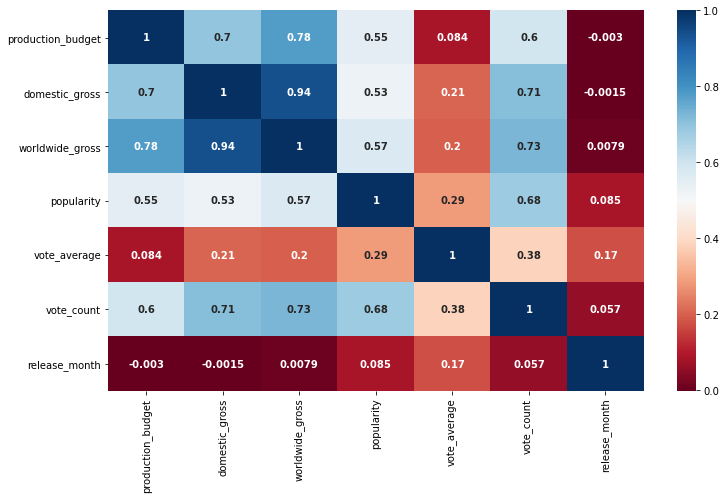

In [87]:
#plotting a seaborn heatmap

plt.figure(figsize=(12,7))
corrn = fd.corr()
sns.heatmap(corrn, cmap= 'RdBu', annot = True, annot_kws ={'fontweight':'bold'})
corrn

There's a positive correlation between the production budget and the following attributes:

  1. domestic_gross
  2. worldwide_gross

##### Question 2: Is there a relationship between Popularity and Vote_Count?


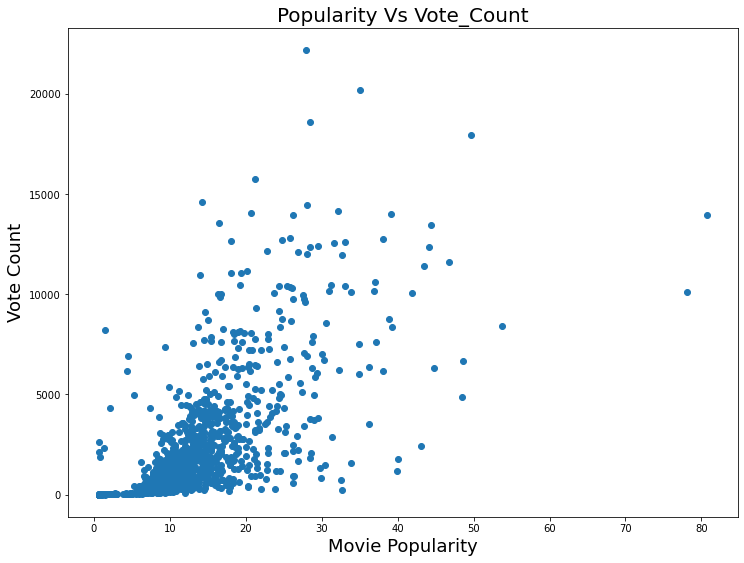

In [74]:
#scatterplot

fig, ax= plt.subplots(figsize=(12,9))

x = fd['popularity']
y = fd['vote_count']

ax.scatter(x,y)

ax.set_title('Popularity Vs Vote_Count', fontsize=20)
ax.set_xlabel("Movie Popularity",fontsize=18)
ax.set_ylabel("Vote Count", fontsize=18)
fig.savefig('Popularity Vs Vote_Count.png')
plt.show();

We can conclude from the plot that, as the movie popularity increases the vote counts increases too.

##### Question 3:  Is there a proper time to premiere a movie?

In [75]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1241
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1228 non-null   object 
 1   production_budget  1228 non-null   float64
 2   domestic_gross     1228 non-null   float64
 3   worldwide_gross    1228 non-null   float64
 4   studio             1228 non-null   object 
 5   original_language  1228 non-null   object 
 6   popularity         1228 non-null   float64
 7   release_date       1228 non-null   object 
 8   vote_average       1228 non-null   float64
 9   vote_count         1228 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 105.5+ KB


In [76]:
fd['release_date'] = pd.to_datetime(fd['release_date'])

In [77]:
fd['release_month'] = fd['release_date'].dt.month


In [78]:
gross_mm = fd.groupby('release_month')['worldwide_gross'].mean()

In [79]:
production_mm = fd.groupby('release_month')['production_budget'].mean()

In [80]:
gross_mean = pd.DataFrame(gross_mm)
gross_mean.reset_index(inplace=True)

In [81]:
production_mean = pd.DataFrame(production_mm)
production_mean.reset_index(inplace=True)

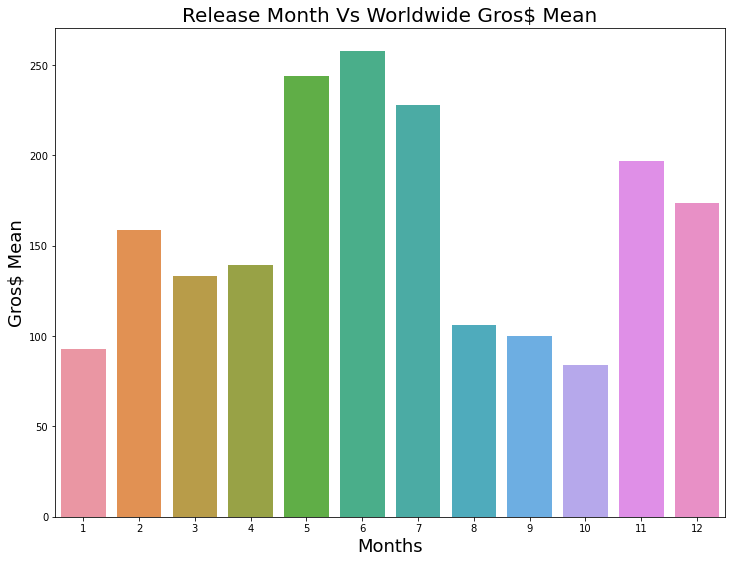

In [82]:
#Plot bar plot

fig, ax = plt.subplots(figsize=(12,9))

x = gross_mean['release_month']
y = gross_mean['worldwide_gross']

ax = sns.barplot(x = x, y = y)


ax.set_title('Release Month Vs Worldwide Gros$ Mean', fontsize=20)
ax.set_xlabel("Months",fontsize=18)
ax.set_ylabel("Gros$ Mean", fontsize=18)

plt.show();

It's advisable that movies that Microsoft are planning to release would be around mid-year and end -year respectively so as to capitalize on the profits made during the Movie Premieres. 

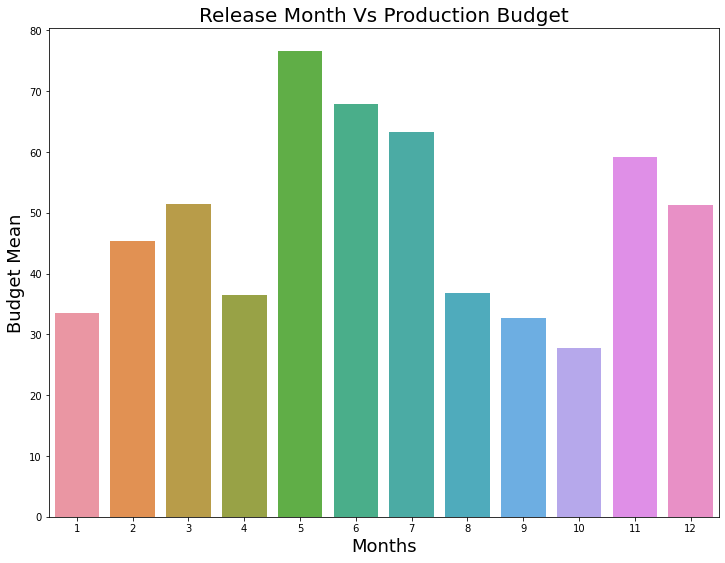

In [83]:
#Plot bar plot

fig, ax = plt.subplots(figsize=(12,9))

x = production_mean['release_month']
y = production_mean['production_budget']

ax = sns.barplot(x = x, y = y)


ax.set_title('Release Month Vs Production Budget', fontsize=20)
ax.set_xlabel("Months",fontsize=18)
ax.set_ylabel("Budget Mean", fontsize=18)

plt.show();

Microsoft should consider having Movie Budgets preferably towards the end of the year for the new Movie Releases which is related to the Worldwide grossing amounts.

#### Question 4: Does the Domestic and Worldwide Gross have sth in common?

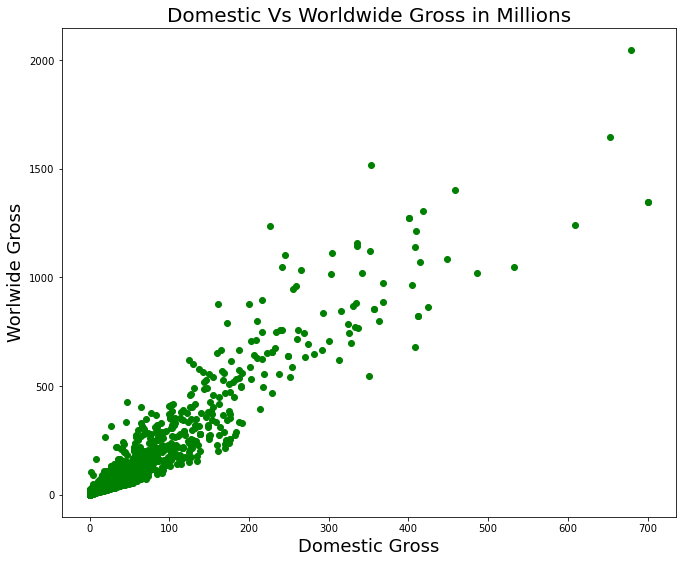

In [84]:
fig, ax= plt.subplots(figsize=(11,9))

x = fd['domestic_gross']
y = fd['worldwide_gross']

ax.scatter(x,y,c = 'green')

ax.set_title('Domestic Vs Worldwide Gross in Millions', fontsize=20)
ax.set_xlabel("Domestic Gross",fontsize=18)
ax.set_ylabel("Worlwide Gross", fontsize=18)
plt.show();

We can interpret that when the Domestic Gross raises thus the Worldwide Gross will be a high amount.

#### Question 5: Studio with the Highest number of movie releases(top 100) that grossed highly Worldwide?

In [100]:
fd

,movie,production_budget,domestic_gross,worldwide_gross,studio,original_language,popularity,release_date,vote_average,vote_count,release_month
0,Pirates of the Caribbean: On Stranger Tides,410.600,241.063875,1045.663875,BV,en,30.579,2011-05-20,6.4,8571,5
1,Avengers: Age of Ultron,330.600,459.005868,1403.013963,BV,en,44.383,2015-05-01,7.3,13457,5
2,Avengers: Infinity War,300.000,678.815482,2048.134200,BV,en,80.773,2018-04-27,8.3,13948,4
3,Justice League,300.000,229.024295,655.945209,WB,en,34.953,2017-11-17,6.2,7510,11
4,Spectre,300.000,200.074175,879.620923,Sony,en,30.318,2015-11-06,6.4,6719,11
...,...,...,...,...,...,...,...,...,...,...,...
1237,Sound of My Voice,0.135,0.408015,0.429448,FoxS,en,7.212,2011-01-22,6.4,169,1
1238,Your Sister's Sister,0.120,1.597486,3.090593,IFC,en,7.115,2012-06-14,6.6,192,6
1239,The Gallows,0.100,22.764410,41.656474,WB (NL),en,9.166,2015-07-10,4.8,591,7
1240,A Ghost Story,0.100,1.594798,2.769782,A24,en,11.886,2017-07-07,7.0,906,7


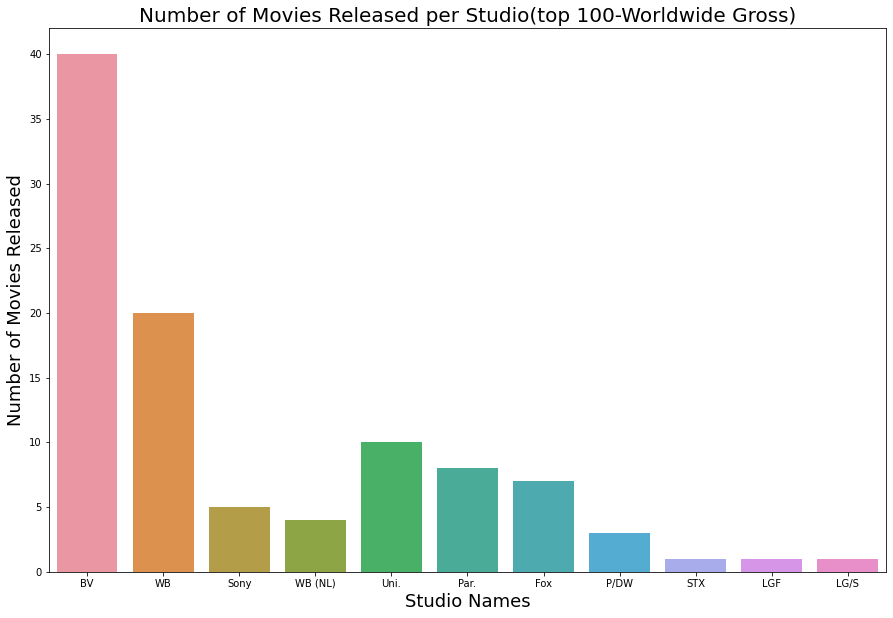

In [111]:
#plotting a countplot

plt.figure(figsize=(15,10))
sns.countplot(x = 'studio', data =fd.head(100))
#plt.xticks(rotation = 90)
plt.xlabel("Studio Names", fontsize=18)
plt.ylabel("Number of Movies Released", fontsize=18)
plt.title("Number of Movies Released per Studio(top 100-Worldwide Gross)", fontsize=20)
plt.show();

The BV studio had the most releases of movies that grossed very highly compared to the other studios


### Conculsions


  * Movies that are produced during the Midyear tend to gross highly compared to the rest of the months.
  * Movies that are popular tend to bring more vote counts.
  * BV studio release movies that are quality and profitable to the market.
  * The high domestic gross of a particular movie, the high it's gross return Worldwide.